# Hands-on project: Interplanetary mission to Mars


Bla bla

$\textbf{What we will learn}$:

(1) Orbital dynamics and interplanetary transfers

(2) How NASA and ESA plan their missions to Mars.

(3) The concept of $\textit{"launch windows"}$ and why the launch date of the rocket matters


## 1 - Simple case: Hohmann transfer

The most $\textbf{efficient}$ transfer in terms of fuel consumption (the cheapest).
That doesn't mean its the fastest. You can get there faster at the cost of more fuel

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

AU = 149597870700             # 1 AU in [m]
MU_SUN = 1.327124e20          # Gravitational Parameter: Sun [m^3/s^2]
MU_EARTH = 3.986e14           # Gravitational Parameter: Earth [m^3/s^2]
EARTH_AU = 1.0                # Earth orbital radius [AU]
MARS_AU = 1.524               # Mars orbital radius [AU]
R_EARTH = 6371000             # Earth's radius [m]
R_MARS = 3390000              # Mars' radius [m]

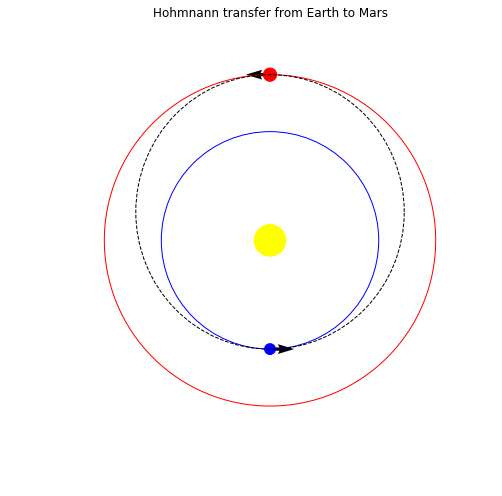

In [138]:
Sun = plt.Circle((0, 0), 0.15*EARTH_AU, facecolor='Yellow', label='Sun')
Earth = plt.Circle((0, -EARTH_AU), 0.05*EARTH_AU, facecolor='Blue', edgecolor='Blue', label='Earth')
Mars = plt.Circle((0, MARS_AU), 0.04*MARS_AU, facecolor='Red', edgecolor='Red', label='Mars')
Earth_Orbit = plt.Circle((0, 0), EARTH_AU, facecolor='none', edgecolor='Blue', label='Earth orbit')
Mars_Orbit = plt.Circle((0, 0), MARS_AU, facecolor='none', edgecolor='Red', label='Mars orbit')

c_ellipse = 0.5 * (MARS_AU - EARTH_AU)
width = (MARS_AU + EARTH_AU)
height = 2*np.sqrt(MARS_AU * EARTH_AU)
Transfer_orbit = Ellipse(xy=[0,c_ellipse], width=width, height=height, angle=90, 
                         facecolor='none', edgecolor='Black', linestyle='--', label='Transfer')

fig, ax = plt.subplots(figsize=(8,8))
ax.add_artist(Sun)
ax.add_artist(Earth)
ax.add_artist(Mars)
ax.add_artist(Earth_Orbit)
ax.add_artist(Mars_Orbit)
ax.add_artist(Transfer_orbit)
ax.set_aspect('equal')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
plt.quiver(0, -EARTH_AU, 1, 0)
plt.quiver(0, MARS_AU, -1, 0)
plt.xlabel('AU')
plt.ylabel('AU')
plt.title('Hohmnann transfer from Earth to Mars')
plt.axis('off')
plt.show()

### 1.1 - Transfer time

In [139]:
rp = EARTH_AU * AU                                    # Radius @ Perihelion (Earth)  [m]
ra = MARS_AU * AU                                     # Radius @ Apohelion (Mars)   [m]
a = 0.5 * (rp + ra)                                   # Semimajor axis "a" [m]
t_f = np.pi * np.sqrt(a**3 / MU_SUN)                  # Time of flight [sec]

t_days = t_f / 3600 / 24
t_months = t_days / 30

print('Hohmann transfer to Mars takes around %.2f days (%.2f months)' %(t_days, t_months))

print('\nMars Odissey (2001) completed the trip in: 200 days')
print('Mars Reconnaissance Orbiter (2005) completed the trip in: 210 days')
print('Mars Science Laboratory (2011) completed the trip in: 254 days')

Hohmann transfer to Mars takes around 258.92 days (8.63 months)

Mars Odissey (2001) completed the trip in: 200 days
Mars Reconnaissance Orbiter (2005) completed the trip in: 210 days
Mars Science Laboratory (2011) completed the trip in: 254 days


### 1.2 - $\Delta V$ needed

Climbing via a Hohmann transfer from a circular orbit at 1 AU (Earth's orbit) to the orbit of Mars at approximately 1.52 AU requires a certain $\Delta V$ to accelerate the spacecraft against the gravitational pull of the Sun.

\begin{equation}
\Delta V = v_p - v_{c,p} = \sqrt{\frac{\mu (1 + e)}{r_p}} - \sqrt{\frac{\mu}{r_p}}
\end{equation}

In [140]:
e = 1. - rp/a                                    # Eccentricity of the Hohmann transfer ellipse
v_cp = np.sqrt(MU_SUN / rp)                      # Circular orbital velocity @ Perihelion (Earth) [m/s]
v_p = np.sqrt(MU_SUN * (1 + e) / rp)             # Velocity @ Perihelion (Earth) for Hohmann transfer [m/s]
dv_hohmann = v_p - v_cp                          # Delta V need to initiate Hohmann transfer

print('Circular velocity at Perihelion Vc,p = %.2f [km/s]' %(v_cp/1000))
print('Required velocity at Perihelion for Hohmann transfer Vp = %.2f [km/s]' %(v_p/1000))
print('\nRequired DeltaV = %.2f [km/s]' %(dv_hohmann/1000))

Circular velocity at Perihelion Vc,p = 29.78 [km/s]
Required velocity at Perihelion for Hohmann transfer Vp = 32.73 [km/s]

Required DeltaV = 2.95 [km/s]


## Launch windows

So far we have not considered neither the relative positions of the planets nor the particular launch date. However, it is very easy to see that those factors matter greatly. As the Earth and Mars orbit the Sun at different orbital speeds, their relative positions change throughout the year. As a result, you can't launch your spacecraft any day you want because by the time you get there, Mars might not be there waiting for you. In fact it could be at the other side of the Sun, millions of kilometers away from you.

## The whole picture

The Hohmann transfer calculation we did at the beginning only accounts for the elliptical branch of the Hohmann transfer. This assumes that the spacecraft has already escaped the gravitational pull of the Earth and it is now within the spher of influence of the Sun.

But in order to get there we will need to accelerate the spacecraft from a circular parking orbit around Earth, to a hyperbolic scape trajectory. That requires an additional push. Let's assume the spacecraft is initially parked at a circular orbit $r_0$, with its associated circular velocity $v_{c0}$

\begin{equation}
v_{c0} = \sqrt{\frac{\mu}{r_0}}
\end{equation}

Now we need to increase the speed of the spacecraft (by burning fuel) until we reach an unknown velocity $v_{0}$ and enter a escape trajectory. In this case the orbits changes from circular to hyperbolic. Recalling the equation of energy balance, we can relate the unknown velocity $v_{0}$ to the velocity we want to reach after escaping Earth's gravity $v_{\infty 0}$

\begin{equation}
\frac{v_{0}^2}{2} - \frac{\mu}{r_0} = \frac{v_{\infty 0}^2}{2}
\end{equation}

The $\Delta V_{\infty 0}$ will then be the difference between the velocity we need $v_{0}$ and the velocity we have $v_{c0}$

\begin{equation}
\Delta V_{\infty 0} = v_{0} - v_{c0}
\end{equation}

The important thing to note here is that $v_{\infty 0}$ is directly related to the velocity at the Perihelion $v_p$ which we computed for the Hohmann transfer. As Earth is orbiting the Sun at $v_{c,p}$ and we want to reach a velocity with respect to the Sun which is $v_p$

\begin{equation}
v_p = v_{c,p} + v_{\infty 0}
\end{equation}

\begin{equation}
v_{\infty 0} = v_p - v_{c,p} = \Delta V
\end{equation}

In other words, starting from a parking orbit at $r_0$ with initial velocity $v_{c0}$ we accelerate the spacecraft up to a velocity $v_0$, that puts it in a escape trajectory that will eventually reach a velocity $v_{\infty 0}$. As this is all with respect to the Earth, we need to take into account the orbital velocity of the Earth around the Sun $v_{c,p}$

In [141]:
h0 = 600 * 1000                                    # Height of initial parking orbit [m]
r0 = R_EARTH + h0                                  # Radius of the parking orbit [m]
vc0 = np.sqrt(MU_EARTH/r0)                         # Circular velocity at parking orbit [m/s]

v_inf0 = dv_hohmann                                # Velocity after escape from Earth [m/s]
v0 = np.sqrt(2 * (v_inf0**2/2 + vc0**2))           # Velocity required to enter escape trajectory [m/s]
dv_escape = v0 - vc0                               # Delta V required to escape Earth [m/s]

print('Circular parking orbit at %.0f km above Earth' %(h0 / 1000))
print('Orbital velocity at parking orbit Vc0 = %.2f [km/s]' %(vc0 / 1000))
print('Required velocity to enter escapte trajectory V0 = %.2f [km/s]' %(v0/1000))

print('\nRequired DeltaV = %.2f [km/s]' %(dv_escape/1000))

Circular parking orbit at 600 km above Earth
Orbital velocity at parking orbit Vc0 = 7.56 [km/s]
Required velocity to enter escapte trajectory V0 = 11.09 [km/s]

Required DeltaV = 3.53 [km/s]


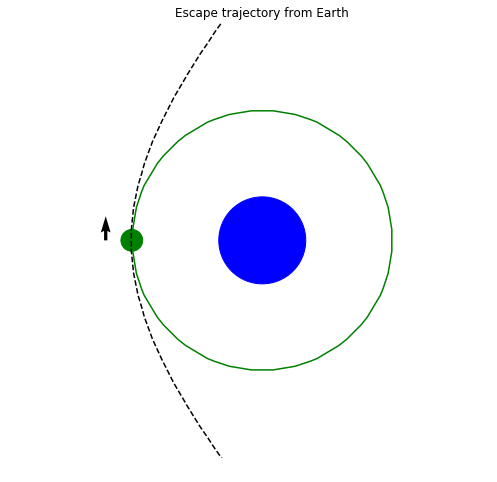

In [142]:
Earth = plt.Circle((0, 0), 0.2, facecolor='Blue', edgecolor='Blue', label='Earth')
d = 0.6
Spacecraft = plt.Circle((-d, 0), 0.05, facecolor='Green', edgecolor='Green', label='Spacecraft')
u = np.linspace(-5, 5, 100)
x, y = np.meshgrid(u, u)

fig, ax = plt.subplots(figsize=(8,8))
a = 1.
b = 1.

plt.contour(x, y,((x + 2.67*d)**2/a**2 - y**2/b**2), [1], colors='k', linestyles='--')
plt.contour(x, y,((x)**2 + y**2), [d**2], colors='Green' )

ax.add_artist(Earth)
ax.add_artist(Spacecraft)
ax.set_aspect('equal')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
plt.quiver(-1.2*d, 0, 0, 1)
plt.title('Escape trajectory from Earth')
plt.axis('off')
plt.show()